In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

In [4]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [11]:
df.drop(columns=['month','day'],inplace=True)

In [12]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

# Visualization

C:\Users\abhik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

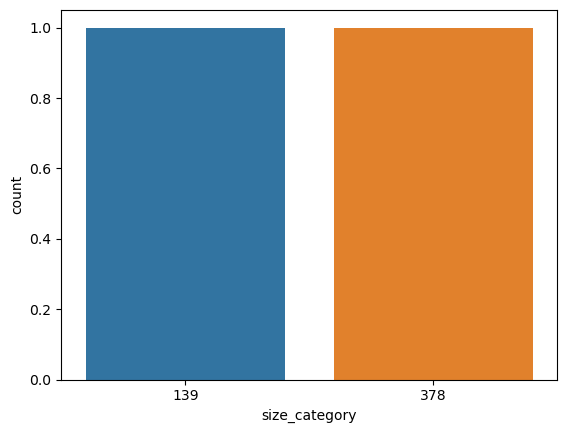

In [13]:
sns.countplot(df['size_category'].value_counts())

# Transformation

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
y=le.fit_transform(df['size_category'])

In [17]:
x=df.iloc[:,:-1]

In [18]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)

# Model Building

In [21]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)


In [22]:
ann=Sequential()

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350,callbacks=[early])

Epoch 1/350
13/13 [==============================] - 2s 36ms/step - loss: 0.8401 - val_loss: 0.7858
Epoch 2/350
13/13 [==============================] - 0s 7ms/step - loss: 0.7902 - val_loss: 0.7486
Epoch 3/350
13/13 [==============================] - 0s 8ms/step - loss: 0.7483 - val_loss: 0.7165
Epoch 4/350
13/13 [==============================] - 0s 7ms/step - loss: 0.7129 - val_loss: 0.6892
Epoch 5/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6849 - val_loss: 0.6653
Epoch 6/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6604 - val_loss: 0.6476
Epoch 7/350
13/13 [==============================] - 0s 7ms/step - loss: 0.6402 - val_loss: 0.6324
Epoch 8/350
13/13 [==============================] - 0s 7ms/step - loss: 0.6233 - val_loss: 0.6193
Epoch 9/350
13/13 [==============================] - 0s 7ms/step - loss: 0.6078 - val_loss: 0.6091
Epoch 10/350
13/13 [==============================] - 0s 7ms/step - loss: 0.5949 - val_loss: 0.5999
Epoch 11

13/13 [==============================] - 0s 8ms/step - loss: 0.3192 - val_loss: 0.4723
Epoch 84/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3168 - val_loss: 0.4706
Epoch 85/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3146 - val_loss: 0.4676
Epoch 86/350
13/13 [==============================] - 0s 8ms/step - loss: 0.3122 - val_loss: 0.4654
Epoch 87/350
13/13 [==============================] - 0s 8ms/step - loss: 0.3108 - val_loss: 0.4632
Epoch 88/350
13/13 [==============================] - 0s 8ms/step - loss: 0.3085 - val_loss: 0.4609
Epoch 89/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3062 - val_loss: 0.4580
Epoch 90/350
13/13 [==============================] - 0s 8ms/step - loss: 0.3041 - val_loss: 0.4571
Epoch 91/350
13/13 [==============================] - 0s 8ms/step - loss: 0.3026 - val_loss: 0.4561
Epoch 92/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3005 - val_loss: 0.4563
Epoch 93/350


13/13 [==============================] - 0s 9ms/step - loss: 0.1961 - val_loss: 0.3895
Epoch 165/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1949 - val_loss: 0.3880
Epoch 166/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1938 - val_loss: 0.3838
Epoch 167/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1926 - val_loss: 0.3851
Epoch 168/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1916 - val_loss: 0.3826
Epoch 169/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1909 - val_loss: 0.3822
Epoch 170/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1897 - val_loss: 0.3824
Epoch 171/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1886 - val_loss: 0.3814
Epoch 172/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1876 - val_loss: 0.3815
Epoch 173/350
13/13 [==============================] - 0s 6ms/step - loss: 0.1866 - val_loss: 0.3802
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.1244 - val_loss: 0.3294
Epoch 246/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1239 - val_loss: 0.3285
Epoch 247/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1230 - val_loss: 0.3216
Epoch 248/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1235 - val_loss: 0.3209
Epoch 249/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1226 - val_loss: 0.3217
Epoch 250/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1213 - val_loss: 0.3219
Epoch 251/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1203 - val_loss: 0.3208
Epoch 252/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1195 - val_loss: 0.3194
Epoch 253/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1189 - val_loss: 0.3193
Epoch 254/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1185 - val_loss: 0.3204
Epoc

13/13 [==============================] - 0s 7ms/step - loss: 0.0805 - val_loss: 0.2636
Epoch 327/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0799 - val_loss: 0.2629
Epoch 328/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0795 - val_loss: 0.2619
Epoch 329/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0790 - val_loss: 0.2635
Epoch 330/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0785 - val_loss: 0.2653
Epoch 331/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0780 - val_loss: 0.2646
Epoch 332/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0776 - val_loss: 0.2641
Epoch 333/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0772 - val_loss: 0.2626
Epoch 334/350
13/13 [==============================] - 0s 8ms/step - loss: 0.0775 - val_loss: 0.2547
Epoch 335/350
13/13 [==============================] - 0s 8ms/step - loss: 0.0781 - val_loss: 0.2547
Epoc

<AxesSubplot:>

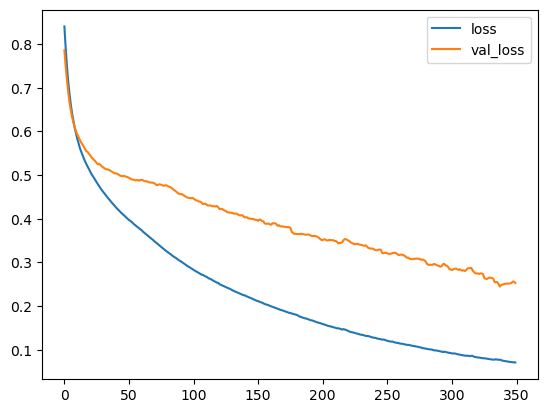

In [23]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [24]:
ypred=ann.predict(xtest)

5/5 [==============================] - 0s 2ms/step


In [25]:
ypred=ypred>0.5

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        36
           1       0.91      0.98      0.94        94

    accuracy                           0.92       130
   macro avg       0.92      0.86      0.89       130
weighted avg       0.92      0.92      0.91       130



# Hyperparametertunning

In [27]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 28))
    else:
        model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))
    counter+=1
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [28]:
tunner=kf.RandomSearch(hyper,objective='val_accuracy',max_trials=3)

In [29]:
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 06s]
val_accuracy: 0.7230769395828247

Best val_accuracy So Far: 0.7230769395828247
Total elapsed time: 00h 00m 16s
INFO:tensorflow:Oracle triggered exit


In [30]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units0': 112,
 'activation0': 'sigmoid',
 'optimizer': 'adam',
 'units1': 8,
 'activation1': 'relu',
 'units2': 8,
 'activation2': 'relu',
 'units3': 8,
 'activation3': 'relu',
 'units4': 8,
 'activation4': 'relu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu',
 'units7': 8,
 'activation7': 'relu',
 'units8': 8,
 'activation8': 'relu',
 'units9': 8,
 'activation9': 'relu'}

In [31]:
x.shape

(517, 28)

In [32]:
model = tunner.get_best_models(num_models=1)[0]
model.build(x.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               3248      
                                                                 
 dense_1 (Dense)             (None, 8)                 904       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [33]:
model.fit(xtrain,ytrain,epochs = 100)

Epoch 1/100
13/13 [==============================] - 4s 4ms/step - loss: 0.6815 - accuracy: 0.7339
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.7339
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.7339
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.7339
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5727 - accuracy: 0.7339
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.7339
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5684 - accuracy: 0.7339
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 0.7339
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5669 - accuracy: 0.7339
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.7339
Epoch 11/

13/13 [==============================] - 0s 4ms/step - loss: 0.1122 - accuracy: 0.9612
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9845
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9845
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9897
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - accuracy: 0.9897
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.9690
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1505 - accuracy: 0.9432
Epoch 90/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9638
Epoch 91/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0839 - accuracy: 0.9767
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9767
Epoch 93/100


In [34]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 4ms/step - loss: 0.1690 - accuracy: 0.9385


[0.16895216703414917, 0.9384615421295166]

In [35]:
ypred = model.predict(xtest)
ypred

5/5 [==============================] - 0s 2ms/step


array([[9.9820018e-01],
       [9.8848212e-01],
       [9.9772298e-01],
       [9.9693245e-01],
       [9.9801105e-01],
       [9.9639702e-01],
       [9.9717355e-01],
       [9.9796057e-01],
       [9.9705952e-01],
       [9.9786711e-01],
       [1.3866792e-03],
       [9.9346066e-01],
       [5.6548323e-04],
       [9.9584198e-01],
       [9.8623979e-01],
       [9.8942751e-01],
       [9.9796903e-01],
       [9.9752611e-01],
       [9.9768889e-01],
       [1.5385610e-03],
       [9.9726599e-01],
       [2.1170175e-03],
       [1.7049521e-03],
       [9.9567747e-01],
       [9.8800731e-01],
       [9.9949610e-01],
       [9.9741310e-01],
       [9.9721783e-01],
       [9.8979783e-01],
       [9.9769050e-01],
       [9.9674535e-01],
       [9.9537539e-01],
       [9.9830443e-01],
       [9.9717414e-01],
       [9.9542314e-01],
       [9.9786752e-01],
       [2.0241598e-03],
       [1.5793609e-03],
       [9.9915713e-01],
       [9.8837113e-01],
       [9.9687767e-01],
       [9.957457

In [36]:
ypred = ypred>0.5
ypred = pd.DataFrame(ypred)

In [37]:
ypred = ypred.replace({True:'Small',False:'Large'})
ypred

,0
0,Small
1,Small
2,Small
3,Small
4,Small
...,...
125,Large
126,Large
127,Large
128,Small


C:\Users\abhik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

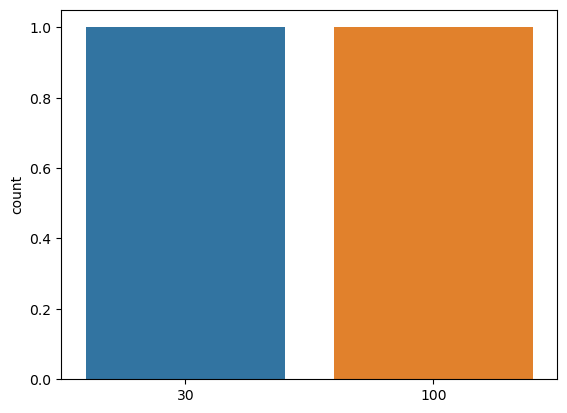

In [38]:
sns.countplot(ypred.value_counts())